In [ ]:
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
#Some Aniamtion
from matplotlib.animation import FuncAnimation

In [ ]:
X,y = make_regression(
    n_samples = 100,
    n_features = 1,
    n_informative = 1,
    n_targets = 1,
    noise=10,
    random_state = 13
)

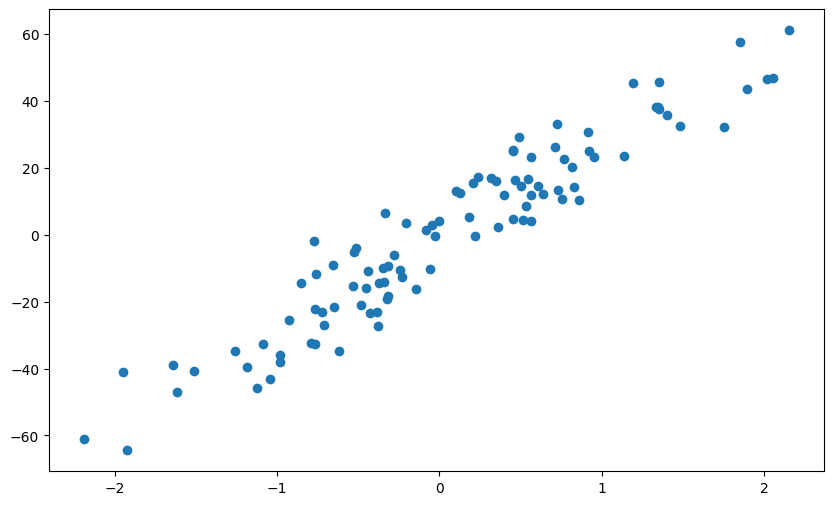

In [ ]:
plt.figure(figsize=(10,6))
plt.scatter(X,y)
plt.show()

In [ ]:
lreg = LinearRegression()
lreg.fit(X,y)

LinearRegression()

In [ ]:
m = lreg.coef_
b = lreg.intercept_
print(f'm={m} b={b}')
line = m*X.reshape(100)+b
print(line[0:2])

m=[27.71819977] b=-1.1473722793384897
[-20.89355896 -13.26426289]


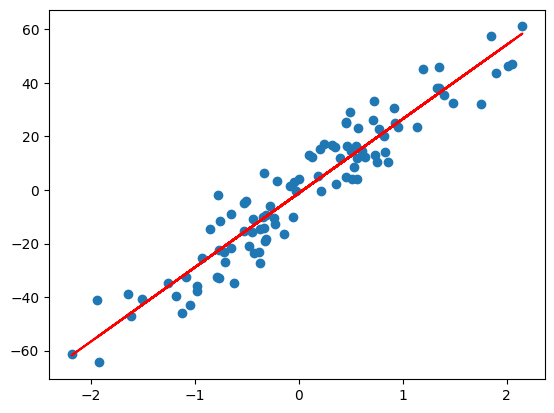

In [ ]:
plt.scatter(X,y)
plt.plot(X,lreg.predict(X),color='red')
plt.show()

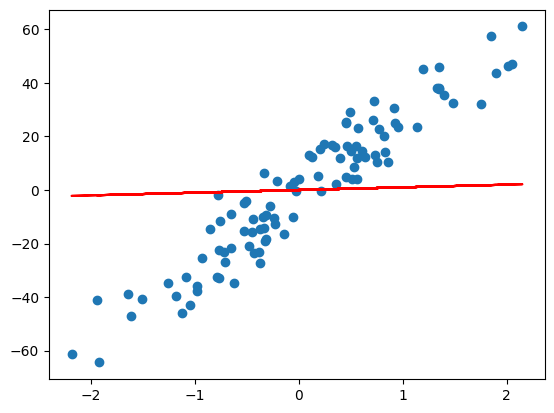

In [ ]:
# we and the same m and b by our algorithm
# m=[27.71819977] b=-1.1473722793384897

m = 1
b = 0
initial_line=(m*X+b).reshape(100)
plt.scatter(X,y)
plt.plot(X,initial_line,color='red')
plt.show()

In [ ]:
# Initial values
m = -56
b = 10
lr = 0.001
for i in range(10000):
  slope_b = -2*np.sum(y-m*X.ravel()-b)
  slope_m = -2*np.sum((y-m*X.ravel()-b)*X.ravel())
  b = b - lr*slope_b
  m = m - lr*slope_m

print(f'm:{lreg.coef_}   b:{lreg.intercept_}')
print(f'm:{m}   b:{b}')

m:[27.71819977]   b:-1.1473722793384897
m:27.718199765142987   b:-1.1473722793384886


In [ ]:
m = 100
b = -45
lr = 0.001

all_b = []
all_m = []

for i in range(100):
  slope_b = -2*np.sum(y-m*X.ravel()-b)
  slope_m = -2*np.sum((y-m*X.ravel()-b)*X.ravel())
  b = b - lr*slope_b
  m = m - lr*slope_m
  all_b.append(b)
  all_m.append(m)

print(f'm:{lreg.coef_}   b:{lreg.intercept_}')
print(f'm:{m}   b:{b}')

m:[27.71819977]   b:-1.1473722793384897
m:27.718200403957788   b:-1.147372528650443


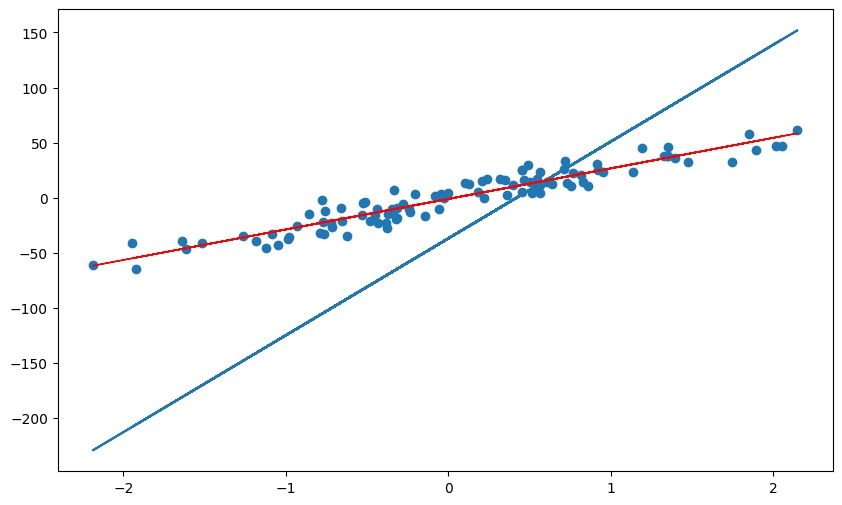

In [ ]:
fig, ax = plt.subplots(figsize=(10,6))
#slope_b = -2*np.sum(y-all_m[0]*X.ravel()-all_b[0])
#slope_m = -2*np.sum((y-all_m[0]*X.ravel()-all_b[0])*X.ravel())
line, = ax.plot(X,X*all_m[0]+all_b[0])
ax.scatter(X,y)
ax.plot(X, lreg.predict(X), color='red',linewidth=1)

def update(i):
  #slope_b = -2*np.sum(y-all_m[i]*X.ravel()-all_b[i])
  #slope_m = -2*np.sum((y-all_m[i]*X.ravel()-all_b[i])*X.ravel())
  line.set_ydata(X*all_m[i]+all_b[i])
  line.set_label(f'b:{all_b[i]} m:{all_m[i]}')
  ax.set_xlabel(f'Epoch : {i+1}, m:{all_m[i]}, b:{all_b[i]}')

anim = FuncAnimation(fig,update,frames=25,interval=300)
plt.show()

In [ ]:
from matplotlib import rc # https://stackoverflow.com/questions/61103994/embedding-matplotlib-animations-in-python-google-colab-notebook
rc('animation', html='jshtml')
anim

In [ ]:
anim